In [68]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
from pydub import AudioSegment
from collections import Counter
import librosa
import numpy as np

In [52]:
wav_files = glob.glob('data/**/*.wav', recursive=True)
txt_files = glob.glob('data/**/*.txt', recursive=True)

In [8]:
total_audio_time = sum([len(AudioSegment.from_file(wav_file)) for wav_file in wav_files])

In [13]:
print('Total Audio Time: {}'.format(total_audio_time))
print('Total Wav Files: {} with {} label files'.format(len(wav_files), len(txt_files)))

Total Audio Time: 2940000
Total Wav Files: 294 with 294 label files


# Visualization

In [18]:
all_text = []
for txt_file in txt_files:
    with open(txt_file, 'r') as txt:
        all_text.append(txt.read())
        
total_text = ' '.join(all_text)

In [31]:
count_freq = dict(Counter(total_text.split()))

In [38]:
df = pd.DataFrame(sorted(count_freq.items(), key=lambda x:x[1], reverse=True), columns=['word', 'freq'])

In [45]:
x_bar = df.iloc[:20].word.values
y_bar = df.iloc[:20].freq.values

Text(0, 0.5, 'freq')

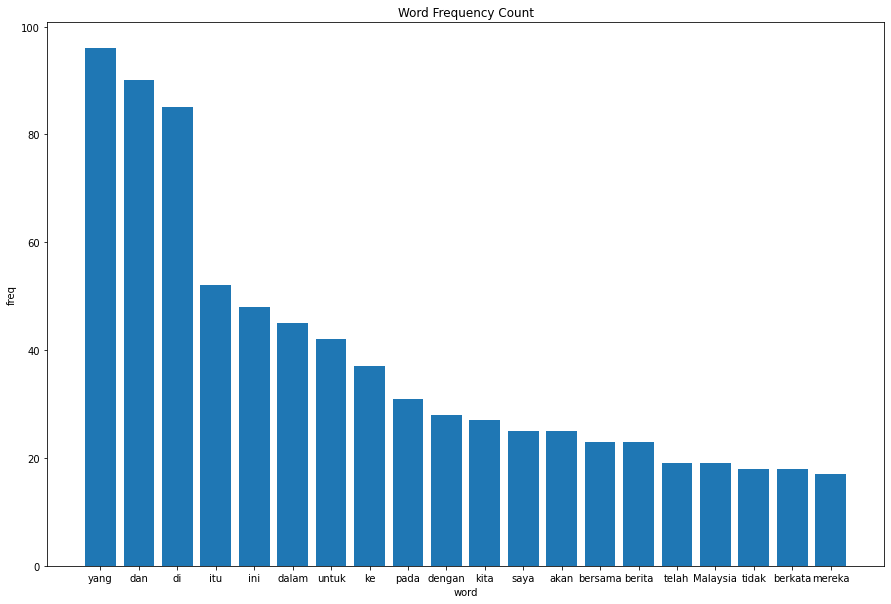

In [49]:
plt.figure(figsize=(15, 10))
plt.title('Word Frequency Count')
plt.bar(x_bar, y_bar)
plt.xlabel('word')
plt.ylabel('freq')

In [56]:
# visualize sound frequency
rate = [AudioSegment.from_file(wav_file).frame_rate for wav_file in wav_files] # all the same hertz

In [65]:
def audio_to_melspectogram(audio, fmin=20, fmax=44100 // 2, scale=1):
    spectogram = librosa.feature.melspectrogram(
        audio, sr=44100, n_mels=128, hop_length=347 * 10,
        n_fft=int(128 * 20 * scale), fmin=fmin, fmax=fmax 
    )
    
    spectogram = librosa.power_to_db(spectogram)
    spectogram = spectogram.astype(np.float32)
    
    return spectogram

In [79]:
random_wavs = np.random.choice(wav_files, 4)

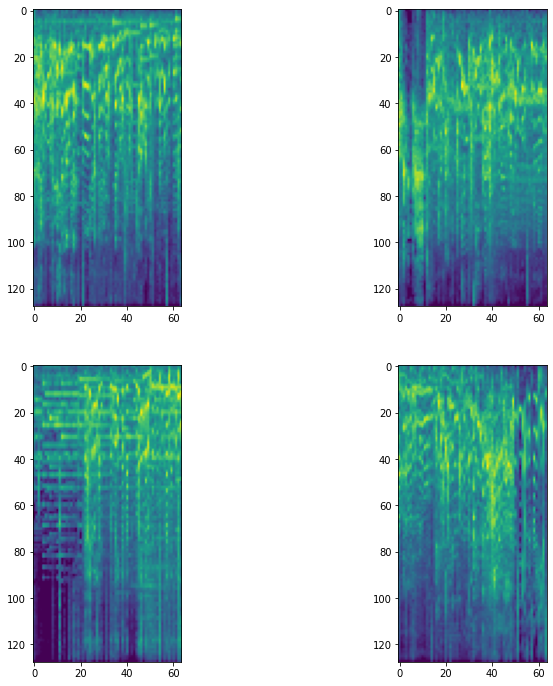

In [81]:
plt.figure(figsize=(12, 12))
for index, random_wav in enumerate(random_wavs):
    plt.subplot(int('22' + str(index + 1)))
    plt.imshow(audio_to_melspectogram(librosa.load(random_wav)[0]))

In [82]:
random_wav = np.random.choice(wav_files)
AudioSegment.from_file(random_wav)